<a href="https://colab.research.google.com/github/NayeliZuniga/Simulacion1/blob/main/Monte_Carlo_(Media_muestral).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo **Crudo** (Media Muestral)

I **=** *∫ g(x) dx* **=** *∫ w(x) ⋅ f(x) dx* **=** E(*g(x)*) **≈** (1/N) ⋅ ∑ *g(x_i)*


Donde:
* x_i~U(a,b)
* w(x)=g(X)⋅(b-a)
* f(x)=1/(b-a) → U(a,b)

Se importan las librerias necesarias

In [4]:
import random
import math
import matplotlib.pyplot as plot

Se define la funcion de la cual se quiere aproximar la integral

In [5]:
def g(x):
  x=math.sqrt(math.atan(x))
  return x

Consideremos el metodo de Monte Carlo de la Media Muestral

In [6]:
def montecarlo_crudo(a, b, n):        #a & b:intervalos de integracion
  al=[]                               #lista para la secuencia {U_i}_{i=1}^n ~ U(0,1)
  x=[]
  gx=[]                               #lista para la evaluiacion de x
  for i in range(n):
  #secuencia {U_i}_{i=1}^n ~ U(0,1)
    al.append(random.uniform(a,b))
  #x_i= a + U_i * (b-a)
    x.append(a+(al[i]*(b-a)))
  #Evaluacion de los x en la funcion
    gx.append(g(x[i]))
  #Estimador
  teta=(b-a)*sum(gx)
  return teta/n


Aplicandolo

In [7]:
montecarlo_crudo(0,1,1000)

0.6417978171951958

In [10]:
def experimento(k):
  evolucion=[]
  for i in range(k):
    evolucion.append(montecarlo_crudo(0,1,i+1))
  plot.plot(evolucion)

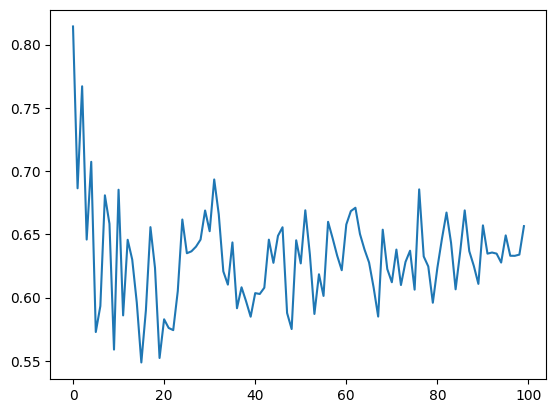

In [11]:
experimento(100)